# PROGRAM 01

**Render this effect for a square source and a *single occluder*, casting a shadow onto an infinite plane. For a fixed geometry, you should find that as the number of point sources goes up, the quantization error goes down.**

To achieve the effect of rendering shadows cast by a square source onto an infinite plane with a single occluder, you can use Python packages that are well-suited for graphics and rendering tasks. Here are some suggestions:

1. **Pygame**: A set of Python modules designed for writing video games. It can be used for 2D graphics and can help you simulate the shadow effect.

2. **Matplotlib**: While primarily used for plotting, it can also be used to create simple 2D graphics and visualize the shadow effects.

3. **Pillow**: A Python Imaging Library that can be used to manipulate images and create effects like shadows.

4. **OpenGL**: If you want to delve into more complex 3D rendering, you can use PyOpenGL, which is a Python binding to OpenGL.

5. **Blender**: For more advanced rendering, you can use Blender's Python API to create realistic shadows and lighting effects.

To implement the effect, you would typically set up a scene with a square light source, an occluder (like a rectangle), and an infinite plane. As you increase the number of point sources, you would calculate the shadows cast by each source and combine them, which would reduce quantization error in the shadow rendering

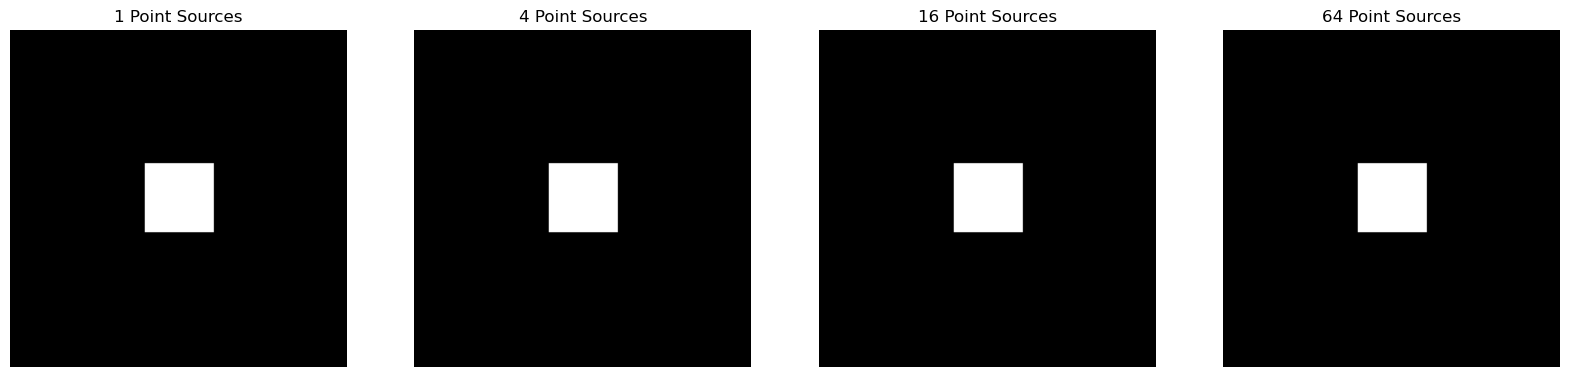

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the shadow intensity on the plane
def compute_shadow_intensity(occluder_center, occluder_size, plane_size, num_point_sources):
    # Initialize the intensity grid for the shadow on the plane
    shadow_intensity = np.zeros((plane_size, plane_size))

    # Calculate the coordinates for each point source in the grid
    source_grid_size = int(np.sqrt(num_point_sources))
    x_sources = np.linspace(-0.5, 0.5, source_grid_size)
    y_sources = np.linspace(-0.5, 0.5, source_grid_size)

    for x_s in x_sources:
        for y_s in y_sources:
            # Offset the source coordinates relative to the occluder center
            source_position = np.array([occluder_center[0] + x_s, occluder_center[1] + y_s])

            # Iterate over each pixel on the plane and compute if it is in shadow
            for i in range(plane_size):
                for j in range(plane_size):
                    plane_point = np.array([i / plane_size - 0.5, j / plane_size - 0.5])
                    # Check if the point is in the shadow of the occluder
                    occluder_bounds = [
                        occluder_center[0] - occluder_size / 2,
                        occluder_center[0] + occluder_size / 2,
                        occluder_center[1] - occluder_size / 2,
                        occluder_center[1] + occluder_size / 2,
                    ]
                    if (
                        occluder_bounds[0] <= plane_point[0] <= occluder_bounds[1]
                        and occluder_bounds[2] <= plane_point[1] <= occluder_bounds[3]
                    ):
                        shadow_intensity[i, j] += 1

    # Normalize the intensity to the range [0, 1]
    shadow_intensity /= num_point_sources
    return shadow_intensity

# Parameters
occluder_center = (0, 0)  # Center of the occluder
occluder_size = 0.2  # Size of the occluder
plane_size = 200  # Resolution of the plane
num_sources_list = [1, 4, 16, 64]  # Different numbers of point sources

# Plotting shadows for different numbers of point sources
fig, axes = plt.subplots(1, len(num_sources_list), figsize=(20, 5))
for idx, num_sources in enumerate(num_sources_list):
    shadow_intensity = compute_shadow_intensity(occluder_center, occluder_size, plane_size, num_sources)
    axes[idx].imshow(shadow_intensity, cmap='gray', origin='lower')
    axes[idx].set_title(f'{num_sources} Point Sources')
    axes[idx].axis('off')

plt.show()

# EXPLANATION
The code snippet is part of a function that calculates the shadow intensity on a 2D plane caused by an occluder when illuminated by multiple point light sources. Here’s a detailed breakdown of the code:

### 1. **Source Coordinates Generation**

**y_sources = np.linspace(-0.5, 0.5, source_grid_size)**

- This line generates an array of y-coordinates for the point sources, evenly spaced between -0.5 and 0.5. The number of points is determined by `source_grid_size`.

### 2. **Iterating Over Point Sources**

**for x_s in x_sources:
    for y_s in y_sources:**

- Two nested loops iterate over the x and y coordinates of the point sources. Each combination of `(x_s, y_s)` represents a position of a light source relative to the occluder.

### 3. **Calculating Source Position**

**source_position = np.array([occluder_center[0] + x_s, occluder_center[1] + y_s])**

- The position of each point source is calculated by offsetting the occluder's center by the current `(x_s, y_s)` values. This gives the absolute position of the light source in the coordinate system.

### 4. **Iterating Over Pixels on the Plane**

**for i in range(plane_size):
    for j in range(plane_size):**

- These nested loops iterate over each pixel on the plane, where `i` and `j` represent the pixel indices.

### 5. **Calculating Pixel Position**

**plane_point = np.array([i / plane_size - 0.5, j / plane_size - 0.5])**

- The position of the current pixel is calculated by normalizing the indices `i` and `j` to a range of -0.5 to 0.5. This positions the pixel in the same coordinate system as the occluder and point sources.

### 6. **Defining Occluder Bounds**

**occluder_bounds = [
    occluder_center[0] - occluder_size / 2,
    occluder_center[0] + occluder_size / 2,
    occluder_center[1] - occluder_size / 2,
    occluder_center[1] + occluder_size / 2,
]**

- The bounds of the occluder are calculated based on its center and size. This creates a rectangular area that defines where the occluder is located in the coordinate system.

### 7. **Checking for Shadow**

**if (
    occluder_bounds[0] <= plane_point[0] <= occluder_bounds[1]
    and occluder_bounds[2] <= plane_point[1] <= occluder_bounds[3]
):
    shadow_intensity[i, j] += 1**

- This conditional checks if the current pixel (`plane_point`) falls within the bounds of the occluder. If it does, it indicates that the pixel is in shadow, and the shadow intensity for that pixel is incremented by 1.

### 8. **Normalizing Shadow Intensity**

**shadow_intensity /= num_point_sources**

- After processing all point sources, the shadow intensity values are normalized by dividing by the total number of point sources. This scales the intensity values to a range between 0 and 1, making it easier to visualize.

### 9. **Return Value**

**return shadow_intensity**

- Finally, the function returns the normalized shadow intensity array, which can be used for visualization or further analysis.

### Summary
Overall, this code effectively simulates how shadows are cast on a plane by an occluder when illuminated by multiple point light sources. It calculates the shadow intensity for each pixel based on whether it falls within the occluder's bounds, allowing for a visual representation of the shadowing effect.